# Setup

In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt         

In [2]:
image_size = (224, 224)

# Data Collection
np.random.seed(0)
train_ds, test_ds = keras.utils.image_dataset_from_directory(
    "../animal_data",
    validation_split = .4,
    subset="both",
    seed=0,
    image_size=image_size,
    labels="inferred",
    label_mode="categorical"
)

print(train_ds)

Found 1944 files belonging to 15 classes.
Using 1167 files for training.
Using 777 files for validation.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>


In [3]:
num_class = 15

input_layer = keras.Input((224,224,3))
x = layers.Rescaling(1.0 / 255)(input_layer)
x = layers.Conv2D(32, 4, 2)(x)
x = layers.MaxPooling2D(3, 2)(x)
x = layers.Conv2D(32, 4, 2)(x)
x = layers.MaxPooling2D(3, 2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dense(32)(x)

output_layer = layers.Dense(num_class, activation="softmax")(x)

model = keras.Model(input_layer, output_layer)

In [4]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_{epoch}.keras")
]

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")]
)

model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=test_ds
)

model.summary()

Epoch 1/25
37/37 [==============================] - 6s 145ms/step - loss: 0.3115 - acc: 0.9334 - val_loss: 0.2350 - val_acc: 0.9364
Epoch 2/25
37/37 [==============================] - 5s 127ms/step - loss: 0.2169 - acc: 0.9361 - val_loss: 0.2089 - val_acc: 0.9385
Epoch 3/25
37/37 [==============================] - 4s 118ms/step - loss: 0.1969 - acc: 0.9403 - val_loss: 0.2011 - val_acc: 0.9405
Epoch 4/25
37/37 [==============================] - 4s 119ms/step - loss: 0.1827 - acc: 0.9436 - val_loss: 0.1985 - val_acc: 0.9414
Epoch 5/25
37/37 [==============================] - 4s 114ms/step - loss: 0.1674 - acc: 0.9487 - val_loss: 0.1934 - val_acc: 0.9432
Epoch 6/25
37/37 [==============================] - 4s 115ms/step - loss: 0.1523 - acc: 0.9527 - val_loss: 0.1866 - val_acc: 0.9464
Epoch 7/25
37/37 [==============================] - 4s 115ms/step - loss: 0.1395 - acc: 0.9581 - val_loss: 0.1852 - val_acc: 0.9462
Epoch 8/25
37/37 [==============================] - 4s 116ms/step - loss: 0.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

def generate_occlusion_heatmap(model, img_path, occlusion_size=10, occlusion_stride=5):
    img = Image.open(img_path)
    img_array = np.array(img) / 255.
    img_array = np.expand_dims(img_array, axis=0)
    preds = model.predict(img_array)

    # Initialize the heatmap
    heatmap = np.zeros((img_array.shape[1], img_array.shape[2]))

    # Iterate through the image and occlude it in patches
    for i in range(0, img_array.shape[1] - occlusion_size, occlusion_stride):
        for j in range(0, img_array.shape[2] - occlusion_size, occlusion_stride):
            img_array_occluded = img_array.copy()
            img_array_occluded[:, i:i + occlusion_size, j:j + occlusion_size, :] = 0
            preds_occluded = model.predict(img_array_occluded)
            heatmap[i:i + occlusion_size, j:j + occlusion_size] += preds[0][np.argmax(preds)] - preds_occluded[0][np.argmax(preds)]

    # Normalize the heatmap
    heatmap /= np.max(heatmap)

    return heatmap

1/1 [==============================] - 0s 16ms/step


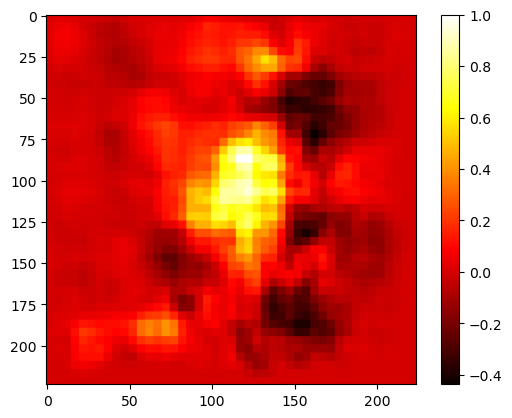

1/1 [==============================] - 0s 17ms/step


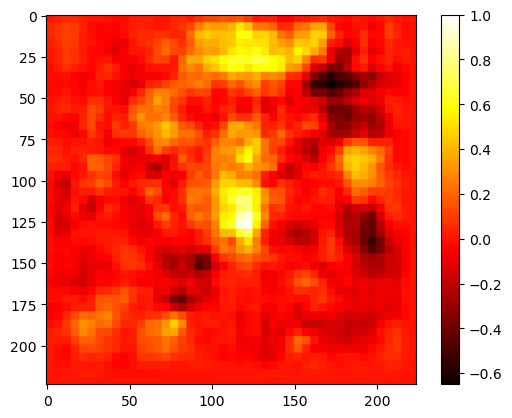

1/1 [==============================] - 0s 20ms/step


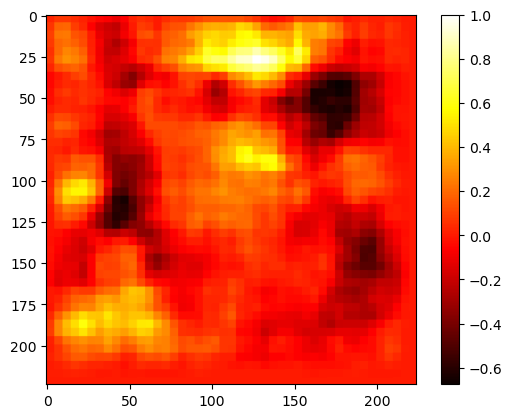

In [24]:
model = tf.keras.models.load_model('save_1.keras')

# Lion
heatmap = generate_occlusion_heatmap(model, 'Lion_1_1.jpg')
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.show()

# Tiger
heatmap = generate_occlusion_heatmap(model, 'Tiger_1_1.jpg')
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.show()

# Bear
heatmap = generate_occlusion_heatmap(model, 'bear_1_1.jpg')
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.show()

1/1 [==============================] - 0s 16ms/step


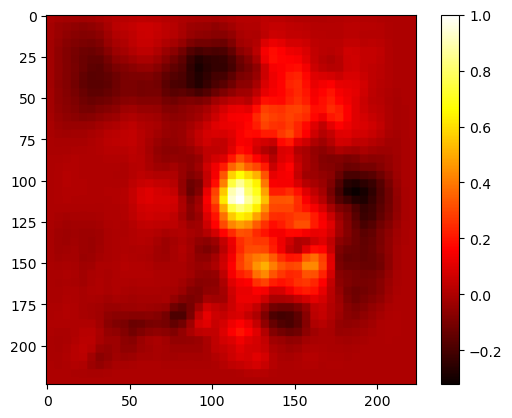

1/1 [==============================] - 0s 19ms/step


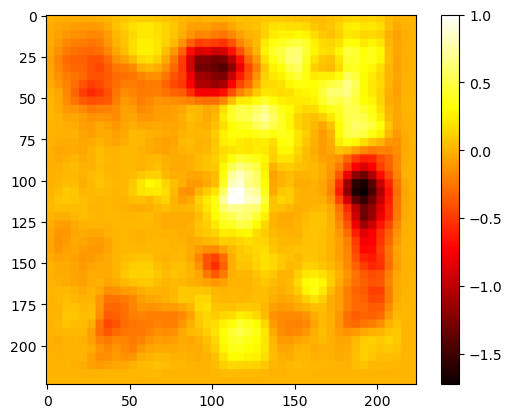

1/1 [==============================] - 0s 25ms/step


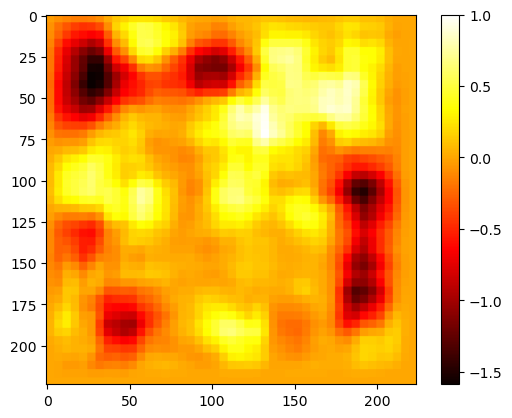

In [22]:
model = tf.keras.models.load_model('save_25.keras')

# Lion
heatmap = generate_occlusion_heatmap(model, 'Lion_1_1.jpg')
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.show()

# Tiger
heatmap = generate_occlusion_heatmap(model, 'Tiger_1_1.jpg')
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.show()

# Bear
heatmap = generate_occlusion_heatmap(model, 'bear_1_1.jpg')
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.show()